# Table of Contents:
<font size="3">Section 1: Required Libraries & Utilities</font> <br>
<font size="3">Section 2: Data Collection and Processing</font> <br>
<font size="3">Section 3: Exploratory Data Analysis</font> <br>
<font size="3">Section 4: Encoding the Categorical Columns</font> <br>
<font size="3">Section 5: Data Visualization]</font> <br>
&emsp; <font size="2">5.1: Univariate Plot Analysis</font> <br> 
&emsp; <font size="2">5.2: Age Distribution</font> <br> 
&emsp; <font size="2">5.3: Distribution of Age with respect to Gender</font> <br> 
&emsp; <font size="2">5.4: Distribution of Age with respect to Heart Disease</font> <br> 
&emsp; <font size="2">5.5: Hypertention Distribution</font> <br> 
&emsp; <font size="2">5.6: Hyperlipidemia Distribution</font> <br> 
&emsp; <font size="2">5.7: Hyperglycemia Distribution</font> <br> 

<font size="3">Section 6: Data Correlation</font> <br>
<font size="3">Section 7: Data Preperation</font> <br>
&emsp; <font size="2">7.1: Data Normalization</font> <br> 
&emsp; <font size="2">7.2: Multicolinearity Analysis</font> <br> 
&emsp;&emsp; <font size="2">7.2.1: Detecting Multicollinearity using VIF</font> <br> 
&emsp;&emsp; <font size="2">7.2.2: Fixing Multicollinearity</font> <br> 


<font size="3">Section 8: Classification Model Training & Testing</font> <br>
&emsp; <font size="2">8.1: Logistic Regression</font> <br> 
&emsp; <font size="2">8.2: Random Forest</font> <br> 
&emsp; <font size="2">8.3: K-Nearest Neighbor</font> <br> 
&emsp; <font size="2">8.4: Gaussian Naive Bayes Classifier</font> <br> 
&emsp; <font size="2">8.5: Gradient Boosting - XGBoost</font> <br> 
&emsp; <font size="2">8.6: Decision Tree</font> <br> 
    
<font size="3">Section 9: Performance Evaluation</font> <br>
&emsp; <font size="2">9.1: Feature Importance Analysis</font> <br> 
&emsp; <font size="2">9.2: Prediction Accuracy Analysis</font> <br> 

# 1. Required Libraries & Utilities <a class="anchor" id="section1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib import pyplot
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
import shap
from sklearn.metrics import precision_score, recall_score,  f1_score, accuracy_score, confusion_matrix, roc_curve, auc

# 2. Data Collection and Processing <a class="anchor" id="section2"></a>

In [2]:
data= pd.read_csv('/Users/parsakeyvani/Desktop/Data Science Projects/heart.csv.xls')

In [3]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
#number of rows and Columns
data.shape

(918, 12)

In [5]:
#getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Data Insight:
This dataset contains no missing values and include categorical and integer variables.

# 3. Exploratory Data Analysis <a class="anchor" id="section3"></a>

In [6]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [7]:
data["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [8]:
data["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [9]:
data["Cholesterol"].mean()

198.7995642701525

In [10]:
i=0
count=0
while i<len(data):
  if data["Cholesterol"][i]>=240:
    count+=1
    i+=1
  else:
    i+=1
print("Unhealthy Cholesterol=", count)
print("Healthy Cholesterol", 918-count)

Unhealthy Cholesterol= 363
Healthy Cholesterol 555


#### Data Insight:
The dataset contains individuals with more healthy cholesterol levels that that of the unhealthy cholesterol levels with the average being in the healthy cholesterol range.

In [11]:
data["Cholesterol"].value_counts()[0]

172

#### Data Insight:
In our Cholesterol colomn, the dataset contains 172 entires of 0. This is problematic because a human cannot survive without Cholesterol ([healthline](https://www.healthline.com/nutrition/dietary-cholesterol-does-not-matter)). Therefore, we need to adjust the zeros. Because we have 172 entries of zero, it is not ideal to remove all the enteies becasue they contain other important characteristics that can help train our models and acheive better predictions. Hence, we need to replace the zeros with meaningful values. First, we identify how many of our participants who have 0 cholesterol entry have a heart disease and how many of them do not have a heart diseass, which will eventually help us in properly adjusting the zeros.

In [12]:
i=0
count=0
while i<len(data):
  if data["Cholesterol"][i]==0 and data["HeartDisease"][i]==0:
    count+=1
    i+=1
  else:
    i+=1
print("Number of participants who have 0 cholesterol wih no heart disease=", count)
print("Number of participants who have 0 cholesterol wih a heart disease=", data["Cholesterol"].value_counts()[0]-count)

Number of participants who have 0 cholesterol wih no heart disease= 20
Number of participants who have 0 cholesterol wih a heart disease= 152


#### Data Insight:
Based on other characteristics in our dataset, we observe that most of the participants who have 0 cholesterol level have a heart disease. Replacing the zeros with the mean of "Cholesterol" variable is not the ideal solution as it will not reflect the participants' results accuratly. Instead, we replace 0 cholesterol level of participants who have heart disease with 240 and we replace 0 cholesterol level of participants without heart disease with 239. According to [MedicalNewsToday](https://www.medicalnewstoday.com/articles/9152), total cholesterol levels of 240 mg/dL and above is considered high and below 240 mg/dl is considered normal. 239mg/dl is an arbitrary number that was picked to indicate normal cholesterol level. This replacement will yield higher precision because it more accuratly reflects the participants results. It is worth mentioning that Cholesterol values in the dataset will later be encoded to binary values to signify healthy and unhealthy Cholesterol level. The reason for encoding this variable is due to its relatively significant number of zeros in the variable, which needed to be adjusted.

In [13]:
i=0
while i<len(data):
    if data["Cholesterol"][i]==0 and data["HeartDisease"][i]==0:
    #data.replace({'Cholesterol':{0:240}}, inplace=True)
        data["Cholesterol"][i]=239
        i+=1
    elif data["Cholesterol"][i]==0 and data["HeartDisease"][i]==1:
    #data.replace({'Cholesterol':{0:240}}, inplace=True)
        data["Cholesterol"][i]=240
        i+=1
    else:
        i+=1

In [14]:
#The zeros are successfully replaced and we now have a reasonable minimum Cholesterol level in our sample.
data["Cholesterol"].value_counts()[239]

24

# 4. Encoding the Categorical Columns <a class="anchor" id="section4"></a>

In [15]:
#Replacing categorical values with integer values.
data.replace({'Sex':{"M":0, "F":1}}, inplace=True)
data.replace({'ChestPainType':{"TA":0, "ATA":1, "NAP":2, "ASY":3}}, inplace=True)
data.replace({'ExerciseAngina':{"N":0, "Y":1}}, inplace=True)
data.replace({'ST_Slope':{"Flat":0, "Down":1, "Up":2}}, inplace=True)
data.replace({'RestingECG':{"Normal":0, "ST":1, "LVH":2}}, inplace=True)
data.replace({'RestingBP':{0:data["RestingBP"].mean()}}, inplace=True) # Since 1 zero input was detected in this variable, we replace it with 
                                                                       # the mean of the variable since it is impossible to have a resting BP of zero.
data['Cholesterol'].values[data['Cholesterol'].values >= 240] = 1
data['Cholesterol'].values[data['Cholesterol'].values > 1] = 0
data.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              1      140.0            1          0           0   
1   49    1              2      160.0            0          0           0   
2   37    0              1      130.0            1          0           1   
3   48    1              3      138.0            0          0           0   
4   54    0              2      150.0            0          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         0             1  
2     98               0      0.0         2             0  
3    108               1      1.5         0             1  
4    122               0      0.0         2             0

In [16]:
#Our dataset is now cleaned and ready to be visualized.
data.describe()

Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.210240       2.251634  132.540737     0.561002   
std      9.432617    0.407701       0.931031   17.989932     0.496535   
min     28.000000    0.000000       0.000000   80.000000     0.000000   
25%     47.000000    0.000000       2.000000  120.000000     0.000000   
50%     54.000000    0.000000       3.000000  130.000000     1.000000   
75%     60.000000    0.000000       3.000000  140.000000     1.000000   
max     77.000000    1.000000       3.000000  200.000000     1.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.603486  136.809368        0.404139    0.887364   
std      0.423046    0.805968   25.460334        0.490992    1.066570   
min      0.000000    0.000000   60.000000        0.000000   -2.600000   
25%      0.000000    0.000000  120.000000        0.000000    0.000000   
50%      0.000000    0.000000  138.000000        0.000000    0.600000   
75%      0.000000    1.000000  156.000000        1.000000    1.500000   
max      1.000000    2.000000  202.000000        1.000000    6.200000   

         ST_Slope  HeartDisease  
count  918.000000    918.000000  
mean     0.929194      0.553377  
std      0.963000      0.497414  
min      0.000000      0.000000  
25%      0.000000      0.000000  
50%      0.000000      1.000000  
75%      2.000000      1.000000  
max      2.000000      1.000000

# 5. Data Visualization <a class="anchor" id="section5"></a>

### 5.1: Univariate Plot Analysis <a class="anchor" id="section5.1"></a>

In [17]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}%".format(y_value)
        plt.annotate(label,(x_value, y_value), xytext = (0, space),textcoords = "offset points", ha = 'center', va = va)                      

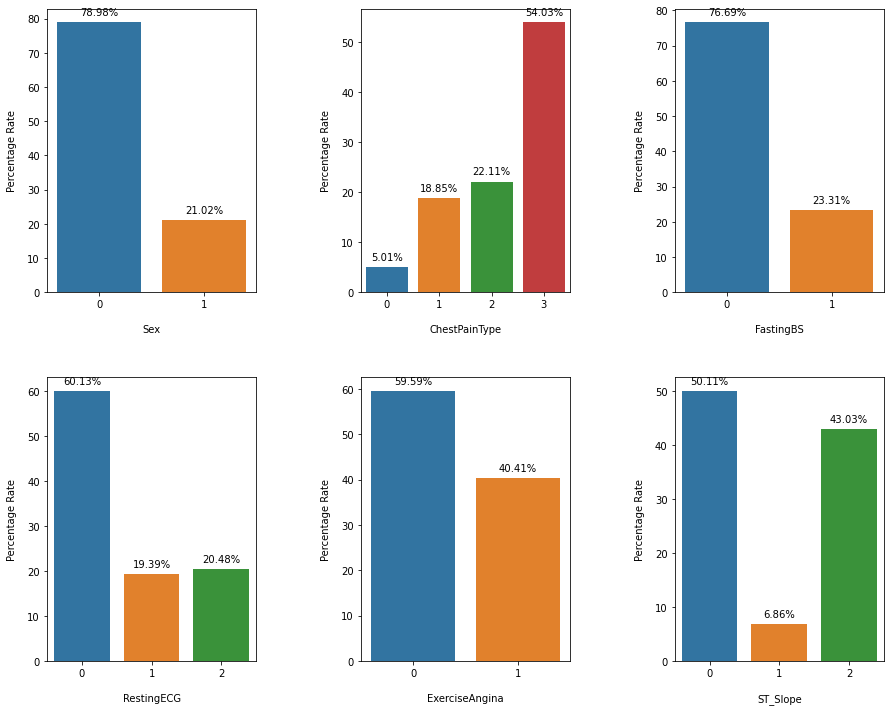

In [18]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina','ST_Slope']
counter = 1
plt.figure(figsize = (15, 12))

for col_list in category_list:   
    series = round(((data[col_list].value_counts(dropna = False))/(len(data[col_list])) * 100), 2)
    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1
del category_list, counter, ax
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

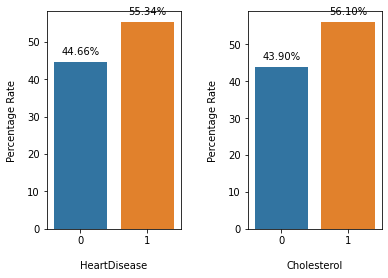

In [19]:
category_list2=['HeartDisease','Cholesterol']
counter = 1
for col_list in category_list2:
    series = round(((data[col_list].value_counts(dropna = False))/ (len(data[col_list])) * 100), 2)
    plt.subplot(1,2, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

#### Data Insight:
~79% of the sample population are male while ~21% are female.<br />
~54% of the sample population are Asymptomatic, ~22% are NAP, ~19% are ATA, and only ~5% are TA.<br />
~77% of the sample population have fasting blood sugare greater than 120 mg/dl and ~23% have fasting blood sugar less than 120 mg/dl.<br />
~60% of the sample population have normal restingECG, ~20% have LVH restingECG and ~19% have ST restingECG.<br />
~60% of the sample population experience angina while exercising while ~40% do not experience it.<br />
~50% of the sample population have flat ST_Slope , ~7% have downward ST_Slope, and ~43% have upward ST_Slope.<br />
~45% of the sample population do not have heart disease while ~55% have heart disease.<br />
~44% of the sample population have normal cholesterol level while ~56% have abnormal cholesterol level.<br />

### 5.2: Age Distribution <a class="anchor" id="section5.2"></a>

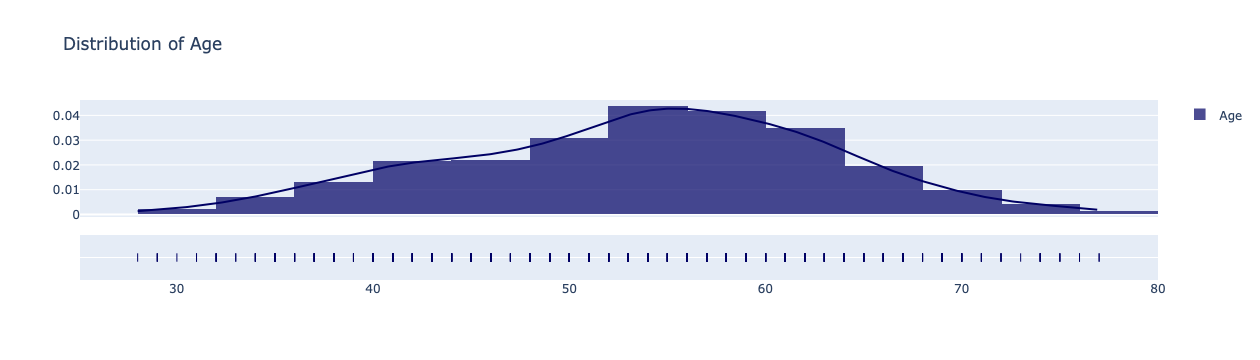

In [20]:
colors = ['rgb(0, 0, 100)']

fig = ff.create_distplot(hist_data = [data["Age"].values], group_labels = ['Age'], 
                         colors = colors, bin_size=4)

fig.update_layout(title_text='Distribution of Age')

fig.show()

#### Data Insight
The age group of people ranges from 28 - 76 with visible spike in the population density at certain age intervals with highest density of [52-56].

### 5.3: Distribution of Age with respect to Gender <a class="anchor" id="section5.3"></a>

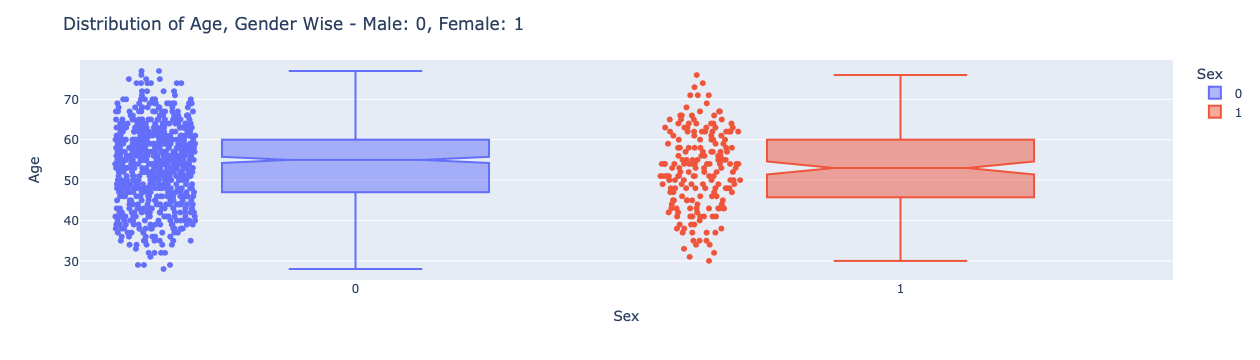

In [21]:
fig = px.box(data, x = 'Sex', y = 'Age', points = "all", hover_name = 'Sex', 
             color = 'Sex', notched=True)

fig.update_layout(title_text="Distribution of Age, Gender Wise - Male: 0, Female: 1")

fig.show()

#### Data Insight:
1. The minimum age for the male sample populaiton is 28 while it is 30 for that the female.
2. The maximum age for the male sample populaiton is 77 while it is 76 for that the female.
3. The median age for the male sample populaiton is 55 while it is 53 for that the female.

### 5.4: Distribution of Age with respect to Heart Disease <a class="anchor" id="section5.4"></a>

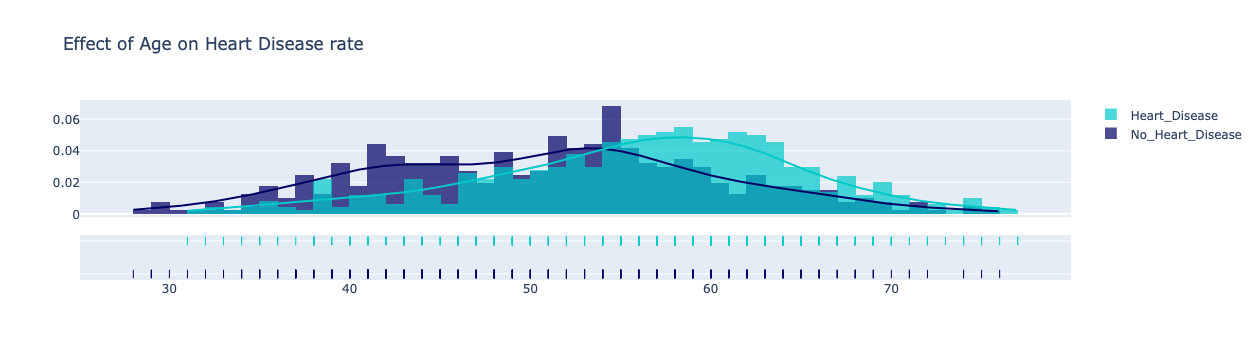

In [22]:
No_Heart_Disease = data[data["HeartDisease"] == 0]["Age"]
Heart_Disease = data[data["HeartDisease"] == 1]["Age"]

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [No_Heart_Disease, Heart_Disease]
group_labels = ['No_Heart_Disease', 'Heart_Disease']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[1, 1], colors = colors)
fig.update_layout(title_text = "Effect of Age on Heart Disease rate")

fig.show()

#### Data Insight:
1. Younger individuals (ages 28-54) in the sample population exhibit no heart disease more than the individuals who exhibit heart disease. Whereas, Older individuals (ages 55-77) have more heart disease than the individuals with no heart disease. 
2. In the sample population, highest heart disease denisty is between ages 58-60 while no heart diseases highest denisty is between ages 40-45.

### 5.5 Hypertention Distribution <a class="anchor" id="section5.5"></a>

In [23]:
hypertension_yes = data[data['RestingBP']>=140]
hypertension_no = data[data['RestingBP']<140]

hypertension_yes_survived = hypertension_yes[data["HeartDisease"] == 0]
hypertension_yes_not_survived = hypertension_yes[data["HeartDisease"] == 1]
hypertension_no_survived = hypertension_no[data["HeartDisease"] == 0]
hypertension_no_not_survived = hypertension_no[data["HeartDisease"] == 1]

<ipython-input-23-02e39d42f80b>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-23-02e39d42f80b>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-23-02e39d42f80b>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-23-02e39d42f80b>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



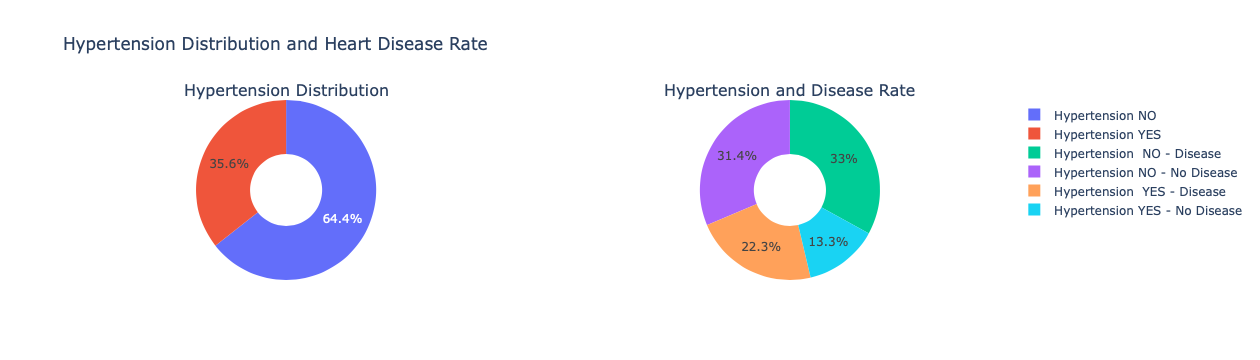

In [24]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['Hypertension Distribution', 'Hypertension and Disease Rate'])

labels1 = ["Hypertension YES","Hypertension NO"]
values1 = [len(hypertension_yes), len(hypertension_no)]

labels2 = ['Hypertension YES - No Disease','Hypertension  YES - Disease', 'Hypertension NO - No Disease',
           'Hypertension  NO - Disease']
values2 = [len(hypertension_yes_survived), len(hypertension_yes_not_survived),
          len(hypertension_no_survived), len(hypertension_no_not_survived)]

# fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Hypertension"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Hypertension & Survival'), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Hypertension Distribution and Heart Disease Rate")

fig.show()

#### Data Insight:
1. Out of the total population, around 36% of the population suffer from high blood pressure or hypertension while around 65% of them do not.
2. Among the 35% of the population who suffer from hypertension, 22% have heart disease, while 13% do not have heart disease. 
3. Among the 65% of the populaiton who do not suffer from hypertension, 31% do not have heart disease while 33% have heart disease which can be caused by other abnormal/unhealthy levels detected in other variables.

### 5.6: Hyperlipidemia Distribution <a class="anchor" id="section5.6"></a>

In [25]:
hyperlipidemia = data[data['Cholesterol']==1]
No_hyperlipidemia = data[data['Cholesterol']==0]

hyperlipidemia_survived = hyperlipidemia[data["HeartDisease"] == 0]
hyperlipidemia_not_survived = hyperlipidemia[data["HeartDisease"] == 1]
No_hyperlipidemia_survived = No_hyperlipidemia[data["HeartDisease"] == 0]
No_hyperlipidemia_not_survived = No_hyperlipidemia[data["HeartDisease"] == 1]

<ipython-input-25-ca588c1801ec>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-25-ca588c1801ec>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-25-ca588c1801ec>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-25-ca588c1801ec>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



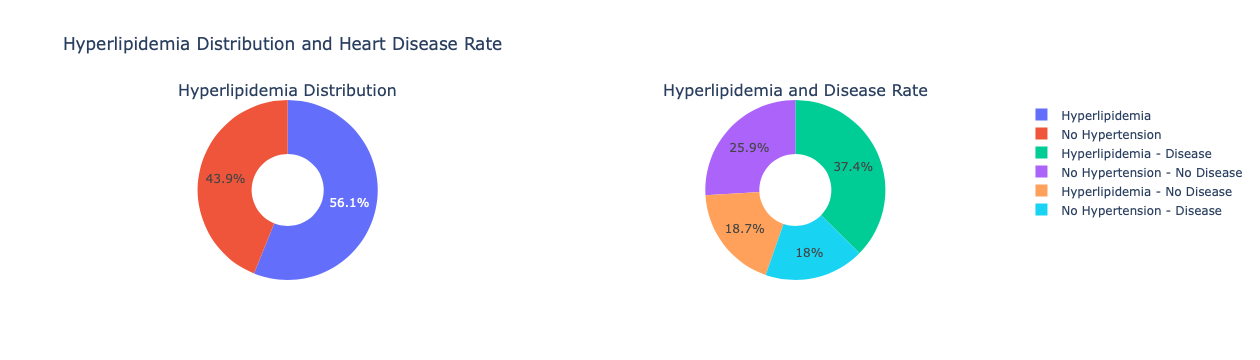

In [26]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['Hyperlipidemia Distribution', 'Hyperlipidemia and Disease Rate'])

labels1 = ["Hyperlipidemia","No Hypertension "]
values1 = [len(hyperlipidemia), len(No_hyperlipidemia)]

labels2 = ['Hyperlipidemia - No Disease','Hyperlipidemia - Disease', 'No Hypertension - No Disease',
           'No Hypertension - Disease']
values2 = [len(hyperlipidemia_survived), len(hyperlipidemia_not_survived),
          len(No_hyperlipidemia_survived), len(No_hyperlipidemia_not_survived)]

# fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Hyperlipidemia"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Hyperlipidemia & Survival'), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Hyperlipidemia Distribution and Heart Disease Rate")

fig.show()

#### Data Insight:
1. Out of the total population, around 56% of the population suffer from high cholesterol or hyperlipidemia while around 44% of them do not.
2. Among the 56% of the population who suffer from hyperlipidemia, 37% have heart disease, while 19% do not have heart disease. 
3. Among the 44% of the populaiton who do not suffer from hyperlipidemia, 26% do not have heart disease while 18% have heart disease which can be caused by other abnormal/unhealthy levels detected in other variables.

### 5.7: Hyperglycemia Distribution <a class="anchor" id="section5.7"></a>

In [27]:
hyperglycemia = data[data['FastingBS']==1]
No_hyperglycemia = data[data['FastingBS']==0]

hyperglycemia_survived = hyperglycemia[data["HeartDisease"] == 0]
hyperglycemia_not_survived = hyperglycemia[data["HeartDisease"] == 1]
No_hyperglycemia_survived = No_hyperglycemia[data["HeartDisease"] == 0]
No_hyperglycemia_not_survived = No_hyperglycemia[data["HeartDisease"] == 1]

<ipython-input-27-4f0e794a1285>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-4f0e794a1285>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-4f0e794a1285>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-4f0e794a1285>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



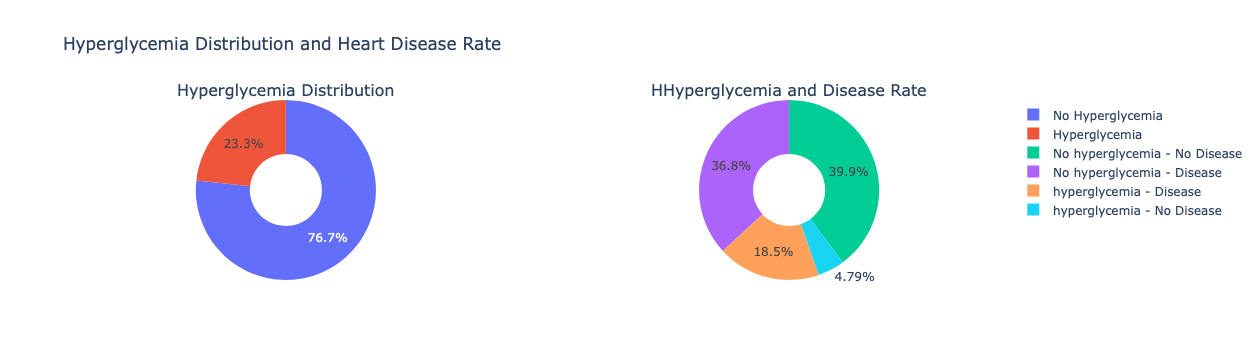

In [28]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['Hyperglycemia Distribution', 'HHyperglycemia and Disease Rate'])

labels1 = ["Hyperglycemia","No Hyperglycemia "]
values1 = [len(hyperglycemia), len(No_hyperglycemia)]

labels2 = ['hyperglycemia - No Disease','hyperglycemia - Disease', 'No hyperglycemia - No Disease',
           'No hyperglycemia - Disease']
values2 = [len(hyperglycemia_survived), len(hyperglycemia_not_survived),
          len(No_hyperglycemia_survived), len(No_hyperglycemia_not_survived)]

# fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Hyperglycemia"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Hyperglycemia & Survival'), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Hyperglycemia Distribution and Heart Disease Rate")

fig.show()

#### Data Insight:
1. Out of the total population, around 23% of the population suffer from high blood sugar or hyperglycemia while around 77% of them do not.
2. Among the 23% of the population who suffer from hyperglycemia, 19% have heart disease, while only 5% do not have heart disease. 
3. Among the 77% of the populaiton who do not suffer from hyperglycemia, 40% do not have heart disease while 37% have heart disease which can be caused by other abnormal/unhealthy levels detected in other variables.

# 6. Data Correlation <a class="anchor" id="section6"></a>

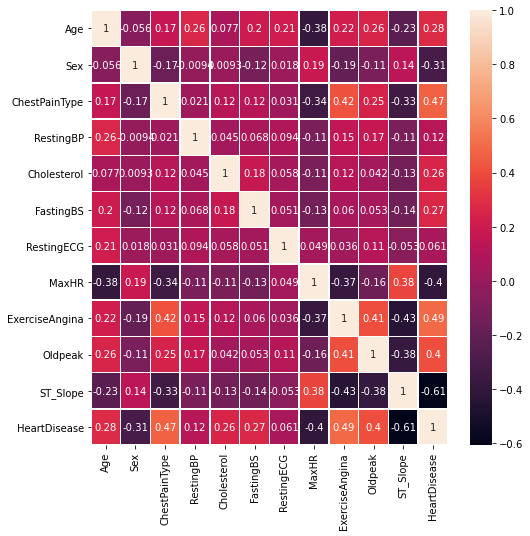

In [29]:
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data.corr(), annot = True, linewidths = .5, ax = ax)
plt.show()

Text(0.5, 1.0, 'Features Correlating with HeartDisease')

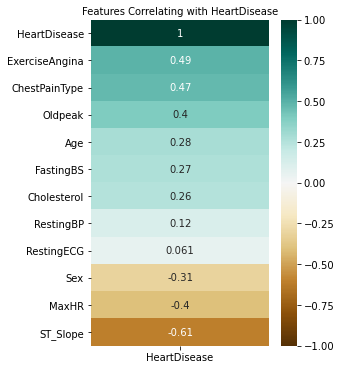

In [30]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(data.corr()[['HeartDisease']].sort_values(by='HeartDisease', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with HeartDisease', fontdict={'fontsize':10}, pad=5)

In [31]:
feature_correlation_matrix = data.corr()
cat_list=["Age","Sex", "ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR",
          "ExerciseAngina","Oldpeak","ST_Slope","HeartDisease"]
strong_corr=[]
moderate_corr=[]
weak_corr=[]
count=0
for category in feature_correlation_matrix['HeartDisease']:
    if abs(category) < 0.1:
        weak_corr.append(cat_list[count])
    if abs(category) >=0.4:
        strong_corr.append(cat_list[count])
    elif abs(category)>0.1 and abs(category)<0.4:
        moderate_corr.append(cat_list[count])
    count=count+1
        
print("Strong correlations:\n", strong_corr)       
print("Moderate correlations:\n", moderate_corr)
print("Weak correlations:\n", weak_corr)

Strong correlations:
 ['ChestPainType', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
Moderate correlations:
 ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS']
Weak correlations:
 ['RestingECG']


#### Data Insight:
1. The Correlation matrix shows the correlation among the features and their correlation with the HeartDisease.
2. 5 features (ChestPainType, MaxHR, ExerciseAngina, Oldpeak, ST_Slope) seem to be most correlated with HeartDisease.
3. Since RestingECG is weakly correlated with HeartDisease, the variable will be dropped from future analysis.

# 7. Data Preperation <a class="anchor" id="section7"></a>

### 7.1: Data Normalization <a class="anchor" id="section7.1"></a>

Our selected dependent and independent variables have different ranges, which need to be rescaled. This is done because in our selected variables, the attributed MaxHR will intrinsically influence the result more due to its large range of values. Therefore, we need to bring all the variables to similar ranges. To do so, we need to identify which of the 3 possible solutions are appropriate for this problem. 
1) Standardize 
2) Normalize 
3) Rescale

To determine whether we should standardize or normalize our data set, we need to check for Guassian (bell curve) distribution. Standardization is useful when the data has varying scales and the algorithm that is being used does make assumptions about the data having a Gaussian distribution. On the other hand, Normalization is useful when the distribution is not Gaussian and when the data has varying scales and the algorithm being used does not make assumptions about the distribution of our data. Rescaling is useful when a dataset contains outliers. Below, are the selected variables for analysis.

In [32]:
selected_variables=data[['HeartDisease', 'ChestPainType', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'Sex','Age','RestingBP', 'Cholesterol', 'FastingBS']]
selected_variables.head()

HeartDisease  ChestPainType  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Sex  \
0             0              1    172               0      0.0         2    0   
1             1              2    156               0      1.0         0    1   
2             0              1     98               0      0.0         2    0   
3             1              3    108               1      1.5         0    1   
4             0              2    122               0      0.0         2    0   

   Age  RestingBP  Cholesterol  FastingBS  
0   40      140.0            1          0  
1   49      160.0            0          0  
2   37      130.0            1          0  
3   48      138.0            0          0  
4   54      150.0            0          0

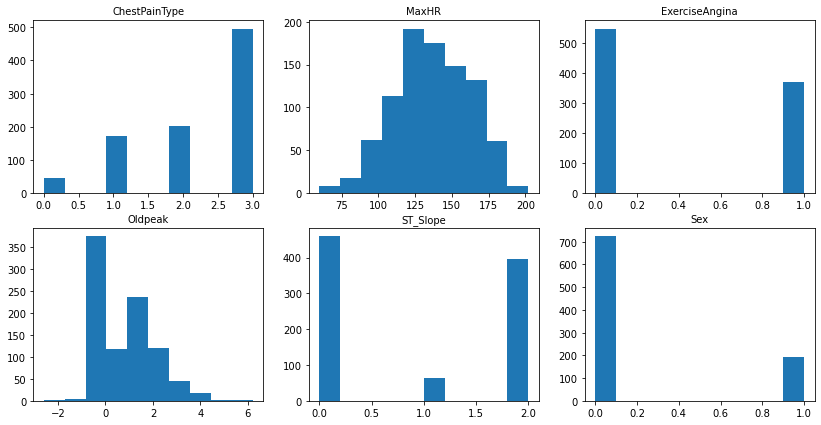

In [33]:
independent_var=data[['ChestPainType', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'Sex',]]
count=1
fig=plt.figure(figsize=(14,7))
for i in independent_var:
    plt.subplot(2, 3, count)  #2 lines, 3 rows, count =index or position
    plt.hist(independent_var[i])
    fig=plt.title(i, fontsize=10)
    count=count+1
plt.show()

#### Data Insight:
The histogram above seems to suggest only MaxHR to be noramally distributed. To confirm our observaiton, we use Shapiro-Wilk Test which is the most powerful test to check the normality of a variable. 

In [34]:
#Shapiro-Wilk Test
for feature in independent_var:
    stat,p= shapiro(independent_var[feature])
    if p>0.05:
        print("The null hypothesis is accepted (p_value=",p,">0.05)")
        print(feature, "is Guassian")
        print("---------------------------------------------------------------------")
    else:
        print("The null hypothesis is rejected (p_value=",p,"<0.05)")
        print(feature, "is not Guassian")
        print("------------------------------------------------")

The null hypothesis is rejected (p_value= 1.24799755668406e-34 <0.05)
ChestPainType is not Guassian
------------------------------------------------
The null hypothesis is rejected (p_value= 0.00016854831483215094 <0.05)
MaxHR is not Guassian
------------------------------------------------
The null hypothesis is rejected (p_value= 1.0264931640718582e-40 <0.05)
ExerciseAngina is not Guassian
------------------------------------------------
The null hypothesis is rejected (p_value= 8.269326883616587e-28 <0.05)
Oldpeak is not Guassian
------------------------------------------------
The null hypothesis is rejected (p_value= 1.520462783783303e-38 <0.05)
ST_Slope is not Guassian
------------------------------------------------
The null hypothesis is rejected (p_value= 7.006492321624085e-45 <0.05)
Sex is not Guassian
------------------------------------------------


#### Data Insight:
The Shapiro-Wilk Test measures all variables to be not Guassian. Even though MaxHR is the only variable that is closest to the significant p value, it still is substantially lower than the significance value to be Guassian. This does not confirm our observation on MaxHR from the histogram. 

Since the selected variables are not Guassian, Normalization is a more useful technique than standardization. Additionally, because our dataset does not contain many outliers, rescaling technique is also not beneficial.

In [35]:
#Normalizing 3 variables: MaxHR, Oldpeak, ST_Slope
scaler = MinMaxScaler() 
selected_variables['MaxHR'] = scaler.fit_transform(selected_variables[['MaxHR']])
selected_variables['RestingBP'] = scaler.fit_transform(selected_variables[['RestingBP']])
selected_variables['Age'] = scaler.fit_transform(selected_variables[['Age']])
selected_variables.head()

HeartDisease  ChestPainType     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  \
0             0              1  0.788732               0      0.0         2   
1             1              2  0.676056               0      1.0         0   
2             0              1  0.267606               0      0.0         2   
3             1              3  0.338028               1      1.5         0   
4             0              2  0.436620               0      0.0         2   

   Sex       Age  RestingBP  Cholesterol  FastingBS  
0    0  0.244898   0.500000            1          0  
1    1  0.428571   0.666667            0          0  
2    0  0.183673   0.416667            1          0  
3    1  0.408163   0.483333            0          0  
4    0  0.530612   0.583333            0          0

In [36]:
selected_variables.describe()

HeartDisease  ChestPainType       MaxHR  ExerciseAngina     Oldpeak  \
count    918.000000     918.000000  918.000000      918.000000  918.000000   
mean       0.553377       2.251634    0.540911        0.404139    0.887364   
std        0.497414       0.931031    0.179298        0.490992    1.066570   
min        0.000000       0.000000    0.000000        0.000000   -2.600000   
25%        0.000000       2.000000    0.422535        0.000000    0.000000   
50%        1.000000       3.000000    0.549296        0.000000    0.600000   
75%        1.000000       3.000000    0.676056        1.000000    1.500000   
max        1.000000       3.000000    1.000000        1.000000    6.200000   

         ST_Slope         Sex         Age   RestingBP  Cholesterol   FastingBS  
count  918.000000  918.000000  918.000000  918.000000   918.000000  918.000000  
mean     0.929194    0.210240    0.520630    0.437839     0.561002    0.233115  
std      0.963000    0.407701    0.192502    0.149916     0.496535    0.423046  
min      0.000000    0.000000    0.000000    0.000000     0.000000    0.000000  
25%      0.000000    0.000000    0.387755    0.333333     0.000000    0.000000  
50%      0.000000    0.000000    0.530612    0.416667     1.000000    0.000000  
75%      2.000000    0.000000    0.653061    0.500000     1.000000    0.000000  
max      2.000000    1.000000    1.000000    1.000000     1.000000    1.000000

#### Data Insight:
After Normalization, the distributions are not centered at zero and the standard deviation is not 1, which confirms normalization of our selected variables.

### 7.2: Multicolinearity Analysis <a class="anchor" id="section7.2"></a>

#### 7.2.1: Detecting Multicollinearity using VIF <a class="anchor" id="section7.2.1"></a>

In [37]:
independent_var=selected_variables[['ChestPainType', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'Sex', 'Age', 'RestingBP', 'Cholesterol', 'FastingBS' ]]
vif_data = pd.DataFrame()
vif_data["Independent Variable"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i) for i in range(len(independent_var.columns))]
vif_data

Independent Variable       VIF
0        ChestPainType  6.947891
1                MaxHR  7.639283
2       ExerciseAngina  2.595726
3              Oldpeak  2.271471
4             ST_Slope  2.689458
5                  Sex  1.364356
6                  Age  8.491872
7            RestingBP  9.248253
8          Cholesterol  2.366603
9            FastingBS  1.431771

##### Data Insight:
Resting blood pressure (RestingBP) and Age are just below the VIF threshold (VIF>=10), indicating that there is a relatively high collinearity between these two variables. We can intuitively understand this because there is a strong correlation between Age and blood pressure (As Age increases, blood pressure increases as well, and vice versa).

#### 7.2.2: Fixing Multicollinearity <a class="anchor" id="section7.2.2"></a>

Even though the two variables are just below the VIF threshold, dropping one of the correlated features will help in bringing down the multicollinearity between correlated features. Below, shows the new VIF value for independent variables after dropping RestingBP. We determined to drop RestingBP variable because it exhibits the larger VIF and has lower correlation with the dependent variable HeartDisease as opposed to those of Age variable.

In [38]:
independent_var=selected_variables[['ChestPainType', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'Sex', 'Age', 'Cholesterol', 'FastingBS' ]]
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i) for i in range(len(independent_var.columns))]
vif_data

feature       VIF
0   ChestPainType  6.862431
1           MaxHR  6.654822
2  ExerciseAngina  2.552944
3         Oldpeak  2.260041
4        ST_Slope  2.679194
5             Sex  1.362900
6             Age  6.766152
7     Cholesterol  2.354842
8       FastingBS  1.431209

##### Data Insight:
After dropping the RestingBP variable, VIF values for all the variables have decreased to a varying extent. This has reduced multicollinearity and the features are acceptable. Hence, these 9 independent variables are selected to train our models, which are: ChestPainType, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, Sex, Age, Cholesterol, FastingBS

# 8. Classification Model Training & Testing <a class="anchor" id="section8"></a>

We will now train models from different machine learning and regression algorithms to predict whether patients have a heart disease or not. The classifiers to be used in this study are:

1. *Logistic Regression*
2. *Random Forest*
3. *K-Nearest Neighbor*
4. *Gaussian Naive Bayes Classifier*
5. *Gradient Boosting - XGBoost*
6. *Decision Tree*

### Train-Test Split

In [39]:
X = independent_var
y = selected_variables[['HeartDisease']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 5)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)
independent_var.describe()

X_Train Shape: (734, 9)
Y_Train Shape: (734, 1)
X_Test Shape: (184, 9)
Y_Test Shape: (184, 1)


ChestPainType       MaxHR  ExerciseAngina     Oldpeak    ST_Slope  \
count     918.000000  918.000000      918.000000  918.000000  918.000000   
mean        2.251634    0.540911        0.404139    0.887364    0.929194   
std         0.931031    0.179298        0.490992    1.066570    0.963000   
min         0.000000    0.000000        0.000000   -2.600000    0.000000   
25%         2.000000    0.422535        0.000000    0.000000    0.000000   
50%         3.000000    0.549296        0.000000    0.600000    0.000000   
75%         3.000000    0.676056        1.000000    1.500000    2.000000   
max         3.000000    1.000000        1.000000    6.200000    2.000000   

              Sex         Age  Cholesterol   FastingBS  
count  918.000000  918.000000   918.000000  918.000000  
mean     0.210240    0.520630     0.561002    0.233115  
std      0.407701    0.192502     0.496535    0.423046  
min      0.000000    0.000000     0.000000    0.000000  
25%      0.000000    0.387755     0.000000    0.000000  
50%      0.000000    0.530612     1.000000    0.000000  
75%      0.000000    0.653061     1.000000    0.000000  
max      1.000000    1.000000     1.000000    1.000000

### 8.1: Logistic Regression <a class="anchor" id="section8.1"></a>

In [40]:
#model = LogisticRegression()
model= LogisticRegression()
# training the Logistic Regression model with training data
lr=model.fit(X_train, y_train.values.ravel())

In [41]:
# Accuracy on test data
X_test_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', round(test_data_accuracy*100,2),"%")

Accuracy score of test data :  90.22 %


### 8.2: Random Forest <a class="anchor" id="section8.2"></a>

In [42]:
rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)
rfc = rfc.fit(X_train.values, y_train.values.ravel())

In [43]:
# Accuracy on test data
Xtest_prediction = rfc.predict(X_test)
testdata_accuracy = accuracy_score(y_test, Xtest_prediction)
print('Accuracy score of test data : ', round(testdata_accuracy*100,2),"%")

Accuracy score of test data :  88.59 %


### 8.3: K-Nearest Neighbor <a class="anchor" id="section8.3"></a>

In [44]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier()

In [45]:
accuracy_percent=round(knn.score(X_test,y_test)*100,2)
print('Accuracy score of test data : ', accuracy_percent,"%")

Accuracy score of test data :  89.67 %


### 8.4: Gaussian Naive Bayes Classifier <a class="anchor" id="section8.4"></a>

In [46]:
gnb = GaussianNB()
gnb.fit(X_train,y_train.values.ravel())

GaussianNB()

In [47]:
y_pred = gnb.predict(X_test)
accuracy_pred=round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy score of test data : ', accuracy_pred,"%")

Accuracy score of test data :  90.76 %


### 8.5: Gradient Boosting - XGBoost <a class="anchor" id="section8.5"></a>

In [48]:
xgb = XGBClassifier(use_label_encoder=False)
xgb = xgb.fit(X_train,y_train.values.ravel())

[16:19:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
y_predictions = xgb.predict(X_test)
accuracy=round(accuracy_score(y_test, y_predictions)*100,2)
print('Accuracy score of test data : ', accuracy,"%")

Accuracy score of test data :  85.87 %


### 8.6: Decision Tree <a class="anchor" id="section8.6"></a>

In [50]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train, y_train.values.ravel())

In [51]:
y_predict = tree.predict(X_test)
accuracy=round(accuracy_score(y_test, y_predict)*100,2)
print('Accuracy score of test data : ', accuracy,"%")

Accuracy score of test data :  79.89 %


# 9. Performance Evaluation <a class="anchor" id="section9"></a>

### 9.1: Feature Importance Analysis (FIA) <a class="anchor" id="section9.1"></a>

#### Logistic Regression FIA 

          Feature     Score
0   ChestPainType  0.745997
1           MaxHR -0.756398
2  ExerciseAngina  0.921299
3         Oldpeak  0.405626
4        ST_Slope -1.162489
5             Sex -1.527588
6             Age  0.983580
7     Cholesterol  1.284341
8       FastingBS  1.243631


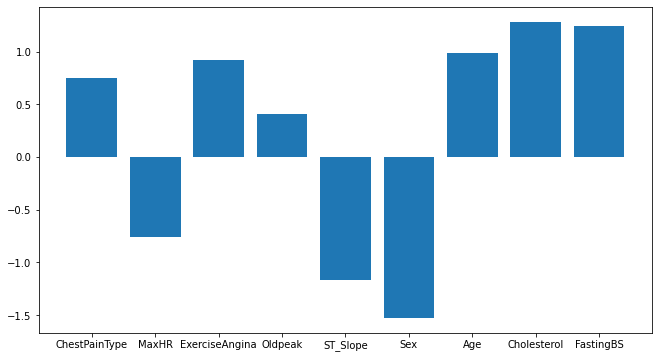

In [52]:
list=[]
importance = model.coef_[0]
for i,v in enumerate(importance):
    list.append((independent_var.columns[i],v))
print(pd.DataFrame(list,columns=['Feature','Score']))
fig=plt.figure(figsize=(11,6))
pyplot.bar([independent_var.columns[i] for i in range(len(importance))], importance)
pyplot.show()

 ##### Data Insight:
The plot shows that Cholesterol is the most important feature in heart disease prediction in Logistic Regression model. However, the rest of the variables seem to play a larger role compared to those of the other models. FastingBS and Age came to be the second and third most important variable. Three variables: Sex, ST_Slope, and MaxHR  seem to be the least important variables in this model's prediction as they suggest that these features make the loss go up.

#### Random Forest FIA 

          Feature     Score
0   ChestPainType  0.145112
1           MaxHR  0.167535
2  ExerciseAngina  0.077168
3         Oldpeak  0.133203
4        ST_Slope  0.242514
5             Sex  0.037826
6             Age  0.124996
7     Cholesterol  0.043176
8       FastingBS  0.028469


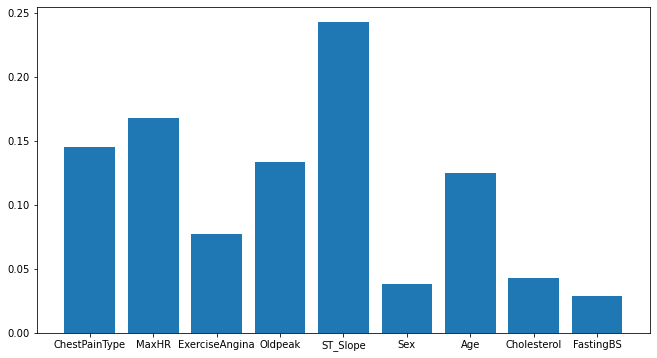

In [53]:
list=[]
importance = rfc.feature_importances_
for i,v in enumerate(importance):
    list.append((independent_var.columns[i],v))
    
print(pd.DataFrame(list,columns=['Feature','Score']))
fig=plt.figure(figsize=(11,6))
pyplot.bar([independent_var.columns[i] for i in range(len(importance))], importance)
pyplot.show()

##### Data Insight:
The plot shows that the ST_Slope remains to be the most important feature in heart disease prediction in Random Forest model. However, the rest of the variables seem to play a larger role compared to those of the other models. MaxHR and ChestPainType came to be the second and third most important variable and Sex being the least important variable in this model's prediction.

#### K-Nearest Neighbor FIA 

          Feature     Score
0   ChestPainType  0.032609
1           MaxHR  0.000000
2  ExerciseAngina  0.019565
3         Oldpeak  0.023913
4        ST_Slope  0.122826
5             Sex  0.025000
6             Age  0.000000
7     Cholesterol  0.020652
8       FastingBS  0.009783


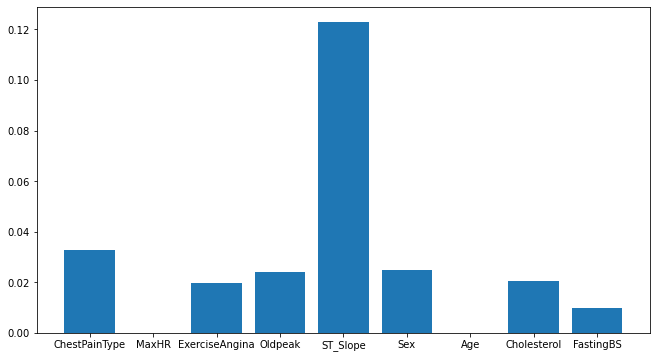

In [54]:
list=[]
results = permutation_importance(knn, X_test, y_test, scoring='accuracy')
importance = results.importances_mean
for i,v in enumerate(importance):
    list.append((independent_var.columns[i],v))
    
print(pd.DataFrame(list,columns=['Feature','Score']))
fig=plt.figure(figsize=(11,6))
pyplot.bar([independent_var.columns[i] for i in range(len(importance))], importance)
pyplot.show()

##### Data Insight:
the plot shows that the ST_Slope remains to be the most important feature in heart disease prediction in KNN model. The rest of the variables seem to have a significatnly lower importance to this model. Oldpeak and ChestPainType came to be the second and third most important variable and MaxHR and Age being the least important variables in this model's prediction. In fact, the two variables are so low in importance that the they can be dropped from this model. 

#### Gaussian Naive Bayes FIA 

          Feature     Score
0   ChestPainType  0.022826
1           MaxHR  0.010870
2  ExerciseAngina  0.015217
3         Oldpeak  0.045652
4        ST_Slope  0.051087
5             Sex  0.033696
6             Age  0.004348
7     Cholesterol  0.017391
8       FastingBS  0.018478


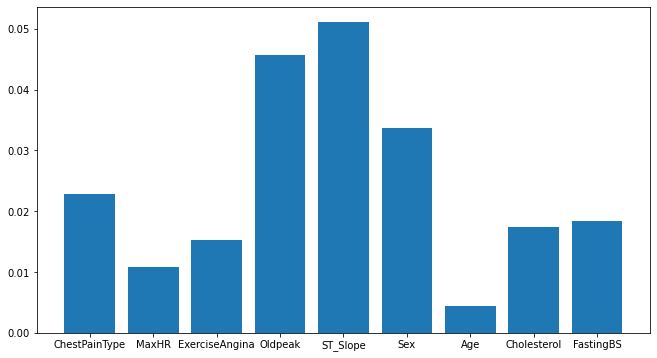

In [55]:
list=[]
imps = permutation_importance(gnb, X_test, y_test)
importance=imps.importances_mean

for i,v in enumerate(importance):
    list.append((independent_var.columns[i],v))
    
print(pd.DataFrame(list,columns=['Feature','Score']))
fig=plt.figure(figsize=(11,6))
pyplot.bar([independent_var.columns[i] for i in range(len(importance))], importance)
pyplot.show()

##### Data Insight:
the plot shows that the ST_Slope remains to be the most important feature in heart disease prediction in Gaussian Naive Bayes model. However, the rest of the variables seem to play a larger role compared to those of the other models. Oldpeak and FastingBS came to be the second and third most important variable and MaxHR being the least important variable in this model's prediction.

#### XGBoost FIA 

          Feature     Score
0   ChestPainType  0.126878
1           MaxHR  0.030563
2  ExerciseAngina  0.057872
3         Oldpeak  0.041253
4        ST_Slope  0.500442
5             Sex  0.069891
6             Age  0.026912
7     Cholesterol  0.064374
8       FastingBS  0.081813


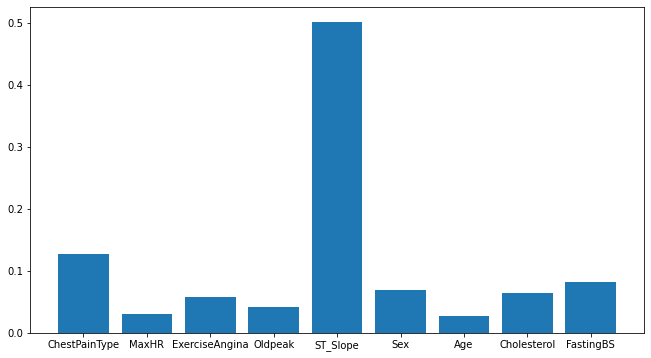

In [56]:
list=[]
importance = xgb.feature_importances_
for i,v in enumerate(importance):
    list.append((independent_var.columns[i],v))
    
print(pd.DataFrame(list,columns=['Feature','Score']))
fig=plt.figure(figsize=(11,6))
pyplot.bar([independent_var.columns[i] for i in range(len(importance))], importance)
pyplot.show()

##### Data Insight:
the plot shows that the ST_Slope was the most important feature in prediction using XGBoost classifer. With a significant drop in importance, ChestPainType and FastingBS came to be the second and third most important variable and Age being the least important variable in this model's prediction.

#### Decision Tree FIA 

          Feature     Score
0   ChestPainType  0.106608
1           MaxHR  0.176736
2  ExerciseAngina  0.027980
3         Oldpeak  0.101304
4        ST_Slope  0.390964
5             Sex  0.033414
6             Age  0.108556
7     Cholesterol  0.031567
8       FastingBS  0.022871


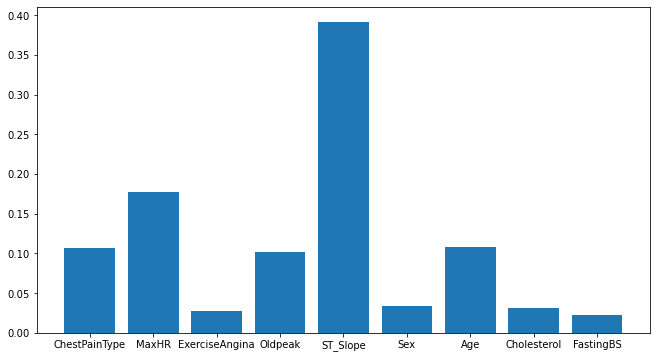

In [57]:
list=[]
importance = tree.feature_importances_
for i,v in enumerate(importance):
    list.append((independent_var.columns[i],v))
    
print(pd.DataFrame(list,columns=['Feature','Score']))
fig=plt.figure(figsize=(11,6))
pyplot.bar([independent_var.columns[i] for i in range(len(importance))], importance)
pyplot.show()

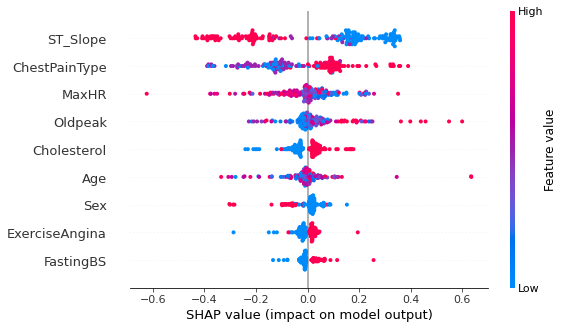

In [58]:
f = plt.figure()
shap_values = shap.TreeExplainer(tree).shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

##### Data Insight:
the plot shows that the ST_Slope was the most important feature in Decision Tree classifer model prediction. It shows that higher ST_Slope results in lower chance of heart disease. ChestPainType shows that higher chestpaintype results in higher chance of heart disease. Oldpeak shows that higher oldpeak results in higher chance of heart disease. Higher cholesterol results in higher chance of heart disease. Higher fasting blood sugar results in higher chance of heart disease and female tend to have lower chance of heart disease. higher exercise angina shows that there's higher chance of heart disease.

### 9.2: Prediction Accuracy Analysis <a class="anchor" id="section9.2"></a>

In [59]:
list_1 = []
models=[]
models.append(["LogisticRegression",lr])
models.append(["RandomForest",rfc])
models.append(["K-NearestNeighbor",knn])
models.append(["GaussianNaiveBayes ",gnb])
models.append(["XGBoost",xgb])
models.append(["DecisionTree",tree])

for index in range(len(models)):
    list_2 = []
    model = models[index][1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    accuracies = cross_val_predict(estimator= model, X = X_train,y = y_train.values.ravel(), cv=3)

    precision = precision_score(y_test,y_pred,average="weighted")
    recall = recall_score(y_test,y_pred,average="weighted")
    f1 = 2/((1/precision)+1/recall)
    list_2.append(models[index][0])
    list_2.append(accuracy_score(y_test,y_pred)*100)
    list_2.append(precision*100)
    list_2.append(recall*100)
    list_2.append(f1*100)
    list_1.append(list_2)
    
final_results = pd.DataFrame(list_1,columns=['Model','Accuracy','Precision','Recall','F1 Score'])    
final_results.sort_values(by=['Accuracy','F1 Score'],inplace=True,ascending=False)
final_results

[16:19:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

Model   Accuracy  Precision     Recall   F1 Score
3  GaussianNaiveBayes   90.760870  90.869724  90.760870  90.815264
0   LogisticRegression  90.217391  90.385732  90.217391  90.301483
2    K-NearestNeighbor  89.673913  89.702890  89.673913  89.688399
1         RandomForest  88.586957  88.708524  88.586957  88.647699
4              XGBoost  85.869565  85.820521  85.869565  85.845036
5         DecisionTree  83.152174  83.616743  83.152174  83.383812

#### Data Insight:
Overall, our models performed very well with relatively high prediction accuracy and F1 score. Taking all four measures into account, our best perfoming model was Gaussian Naive Bayes with around 91% accuracy and F1 score. Our secound and third best performing models were Logistic Regression and K-Nearest Neighbor with around 90% accuracy and F1 score. The high model prediction results signify robust data preperation and well trained models. Additionally, my feature importance analysis suggests that models that had features closely important to one another performed better than other models. Also, the two best perfoming models gave significantly more imoportance to FastingBS as opposed to that of the other variables, which can perhaps explain one of many reasons they outperfomed other models. 